<a href="https://colab.research.google.com/github/Zamoca42/TIL/blob/main/AI/Keras_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data
(X_train, Y_train),(X_test,Y_test) = keras.datasets.mnist.load_data()
# keras에서 제공하는 데이터

print(X_train[0])
print(Y_train[0])

# 출력결과

# [[[0 0 0 ... 0 0 0]
#   [0 0 0 ... 0 0 0]
#   [0 0 0 ... 0 0 0]
#   ...
#   [0 0 0 ... 0 0 0]
#   [0 0 0 ... 0 0 0]
#   [0 0 0 ... 0 0 0]]
#   ...]

# 해당 출력은 X_train의 28*28의 그레이스케일 데이터를 생략한 값

11490434/11490434 [==============================] - 0s 0us/step
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]

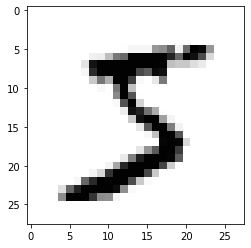

In [ ]:
plt.imshow(X_train[0], cmap='Greys', interpolation='nearest')
plt.show()

In [ ]:
print(X_train[0].shape)
print(Y_train[0].shape)

(28, 28)
()


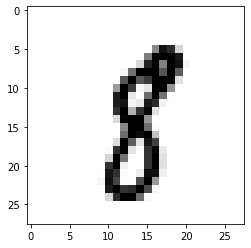

In [ ]:
plt.imshow(X_train[300], cmap='Greys', interpolation='nearest')
plt.show()

# 학습을 하려면 데이터를 입력해야한다

In [ ]:
# Train data 갯수
print(X_train.shape)
print(Y_train.shape)
# Test data 갯수
print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
# X_train = (tensorflow.keras.utils.to_categorical(Y_train))
# Y_train = (tensorflow.keras.utils.to_categorical(Y_train))
# 5 -> [0,0,0,0,0,1,0,0,0,0]
# 1 -> [0,1,0,0,0,0,0,0,0,0]

X_train = X_train.reshape(60000, 28*28) # 원활한 학습을 위해 2D데이터를 1D데이터로 바꿔준다.
X_test = X_test.reshape(-1, 28*28) # 데이터 갯수를 정확히 모른다면 60000 자리에 -1넣으면 해결

model = keras.models.Sequential([
    keras.layers.Dense(units=90, activation='relu', input_shape=[28*28]),
    keras.layers.Dense(units=30, activation='relu'), 
    keras.layers.Dense(units=10, activation='softmax'),
])

opt = keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# to_categorical -> categorical_crossentropy
# model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy']) # one-hot encoding

hist = model.fit(X_train, Y_train, batch_size=1000, epochs=100, validation_split=0.2, shuffle=True, verbose = 0)
# callbacks = (custom hist) -> epoch한 데이터를 저장

In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


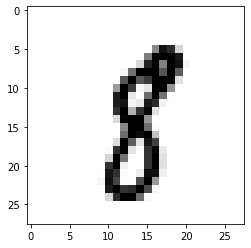

In [ ]:
plt.imshow(X_train[300].reshape(28,28), cmap='Greys', interpolation='nearest')
# 위는 1D 데이터로 reshape 했기 때문에 다시 plot화 하려면 2D로 reshape해야한다
plt.show()

test loss: 0.13001351058483124
test accuracy: 0.9675999879837036
n: 7356
1/1 [==============================] - 0s 57ms/step
predict:  [7]
True_value : 8


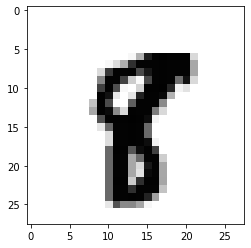

n: 6250
1/1 [==============================] - 0s 22ms/step
predict:  [0]
True_value : 7


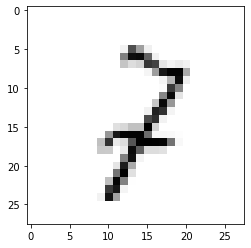

n: 9419
1/1 [==============================] - 0s 21ms/step
predict:  [7]
True_value : 5


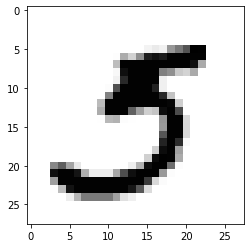

n: 7931
1/1 [==============================] - 0s 21ms/step
predict:  [9]
True_value : 7


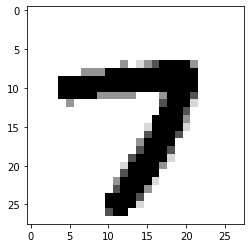

n: 3357
1/1 [==============================] - 0s 25ms/step
predict:  [4]
True_value : 2


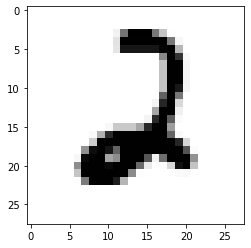

n: 5120
1/1 [==============================] - 0s 21ms/step
predict:  [2]
True_value : 0


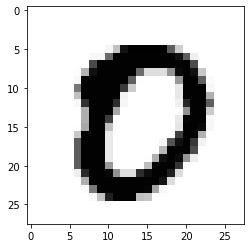

n: 9656
1/1 [==============================] - 0s 21ms/step
predict:  [3]
True_value : 7


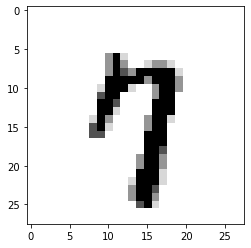

n: 4354
1/1 [==============================] - 0s 17ms/step
predict:  [2]
True_value : 7


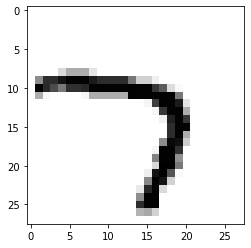

n: 2308
1/1 [==============================] - 0s 23ms/step
predict:  [3]
True_value : 5


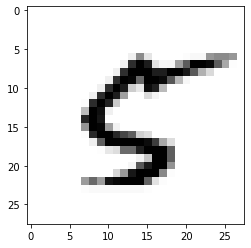

n: 544
1/1 [==============================] - 0s 21ms/step
predict:  [4]
True_value : 5


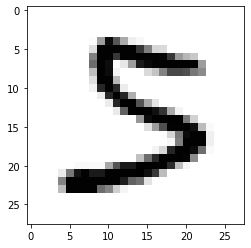

In [ ]:
# 평가
score = model.evaluate(X_test,Y_test, verbose=0)
print("test loss:", score[0])
# [0]에는 compile의 loss가 들어감
print("test accuracy:", score[1])
# [1]부터는 compile의 metrics에 넣은 것들이 하나씩 들어감
# 현재 [1]은 accuracy
# https://keras.io/api/metrics/regression_metrics/

# prediction과 맞는지 비교

for i in range(10):
  n = int(np.random.rand()*10000)
  print("n:", n)
  print("predict: ", np.argmax(model.predict(X_test[n].reshape(1,-1)),axis=1))
  print("True_value :", Y_train[n])

  plt.imshow(X_train[n].reshape(28,28), cmap='Greys', interpolation='nearest')
  plt.show()

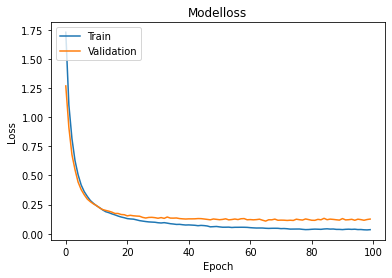

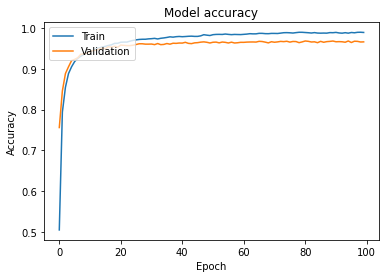

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Modelloss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()